<a href="https://colab.research.google.com/github/Amritbhardwajgsv/housepricedetection/blob/main/banglorehouse_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/bengaluru_house_prices.csv')

In [ ]:
dfchecker=pd.read_csv('/content/bengaluru_house_prices.csv')

In [ ]:
dfchecker.isna().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [ ]:
df.shape

(13320, 9)

In [ ]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df.isna().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


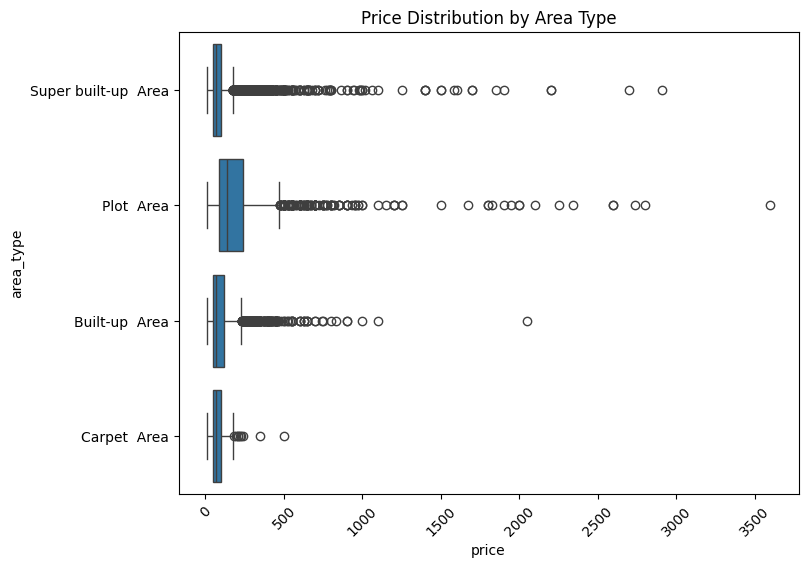

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.boxplot(y="area_type", x="price", data=pd.read_csv('/content/bengaluru_house_prices.csv'))
plt.xticks(rotation=45)
plt.title("Price Distribution by Area Type")
plt.show()

In [ ]:
df['area_type'].unique()


array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [ ]:
df['area_type'].nunique()


4

In [ ]:
#  so we get up an idea that this is based on the house has 4 types of unique data sets


In [ ]:
# so we will do one hot encoding for this and the best way for this is because it is categorical data

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(drop="first", sparse_output=False)


In [ ]:
encoded=encoder.fit_transform(df[['area_type']])

In [ ]:
encoded_df=pd.DataFrame(encoded,columns=encoder.get_feature_names_out(['area_type']))

In [ ]:
df= pd.concat([df.drop(columns=['area_type']), encoded_df], axis=1)

In [ ]:
df.head()

,availability,location,size,society,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,0.0,0.0,1.0
1,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,0.0,1.0,0.0
2,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,0.0,0.0,0.0
3,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,0.0,0.0,1.0
4,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,0.0,0.0,1.0


In [ ]:
df['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [ ]:
reference_date = pd.to_datetime("2025-01-01")

In [ ]:
df["ready_flag"] = df["availability"].apply(lambda x: 1 if x in ["Ready To Move", "Immediate Possession"] else 0)

In [ ]:
def days_left_ignore_year(val):
    if val in ["Ready To Move", "Immediate Possession"]:
        return 0
    try:
        # Parse day-month only, add a dummy year
        possession_date = pd.to_datetime(val + "-2025", format="%d-%b-%Y", errors="coerce")
        reference_date = pd.to_datetime("01-Jan-2025", format="%d-%b-%Y")
        if possession_date is pd.NaT:
            return 0
        return (possession_date - reference_date).days
    except:
        return 0

df["availability"] = df["availability"].apply(days_left_ignore_year)

In [ ]:
df.head()

,availability,location,size,society,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,ready_flag
0,352,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,0.0,0.0,1.0,0
1,0,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,0.0,1.0,0.0,1
2,0,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,0.0,0.0,0.0,1
3,0,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,0.0,0.0,1.0,1
4,0,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,0.0,0.0,1.0,1


In [ ]:
df.head()

,availability,location,size,society,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,ready_flag
0,352,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,0.0,0.0,1.0,0
1,0,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,0.0,1.0,0.0,1
2,0,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,0.0,0.0,0.0,1
3,0,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,0.0,0.0,1.0,1
4,0,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,0.0,0.0,1.0,1


In [ ]:
df.sample(15)

,availability,location,size,society,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,ready_flag
10836,0,Basava Nagar,3 BHK,Prvaska,1182,2.0,1.0,60.10,0.0,0.0,1.0,1
10280,0,Kumaraswami Layout,6 Bedroom,NaN,510,4.0,1.0,70.00,0.0,1.0,0.0,1
2315,0,Hennur Road,2 BHK,Koagati,987,2.0,1.0,49.00,0.0,0.0,1.0,1
57,0,Ramakrishnappa Layout,2 BHK,PeBayle,1500,2.0,2.0,185.00,0.0,0.0,1.0,1
10085,0,Basaveshwara Nagar,4 Bedroom,NaN,700,4.0,2.0,125.00,0.0,1.0,0.0,1
8633,0,Bettadasanapura,5 Bedroom,NaN,1200,5.0,1.0,90.00,0.0,1.0,0.0,1
8979,0,JP Nagar,6 Bedroom,NaN,1800,6.0,0.0,68.00,0.0,0.0,0.0,1
1407,0,Nagasandra,5 Bedroom,NaN,4050,5.0,2.0,140.00,0.0,0.0,0.0,1
2712,0,Rajiv Nagar,2 BHK,Ahntyve,1263,2.0,1.0,93.32,0.0,0.0,1.0,1
7226,0,Whitefield,2 BHK,Rabow R,1060,2.0,1.0,35.00,0.0,0.0,1.0,1


In [ ]:
df['ready_flag'].value_counts()


,count
ready_flag,
1,10597
0,2723


In [ ]:
df['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [ ]:
df['location'].value_counts()


,count
location,
Whitefield,540
Sarjapur Road,399
Electronic City,302
Kanakpura Road,273
Thanisandra,234
...,...
3rd Stage Raja Rajeshwari Nagar,1
Chuchangatta Colony,1
"Electronic City Phase 1,",1


In [ ]:
# Fill NaN in 'location' with the mode of the column
df['location'] = df['location'].fillna(df['location'].mode()[0])

# Count locations
threshold = 10
counts = df['location'].value_counts()

# Group rare locations
df['location'] = df['location'].apply(lambda x: x if counts[x] >= threshold else "Other")


In [ ]:
df.head()

,availability,location,size,society,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,ready_flag
0,352,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,0.0,0.0,1.0,0
1,0,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,0.0,1.0,0.0,1
2,0,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,0.0,0.0,0.0,1
3,0,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,0.0,0.0,1.0,1
4,0,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,0.0,0.0,1.0,1


In [ ]:
df.sample(15)

,availability,location,size,society,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,ready_flag
9052,0,Uttarahalli,3 BHK,NaN,1360,2.0,2.0,47.59,0.0,0.0,1.0,1
4515,0,Malleshpalya,4 Bedroom,NaN,2592,4.0,2.0,250.00,0.0,1.0,0.0,1
2925,0,Hebbal,2 BHK,Diaveic,1040,2.0,2.0,46.00,0.0,0.0,1.0,1
11850,0,Tindlu,2 BHK,NaN,1165,2.0,2.0,59.80,0.0,0.0,0.0,1
12830,199,Kanakpura Road,2 BHK,Soazak,1332,2.0,1.0,108.00,0.0,0.0,1.0,0
12422,198,Bhoganhalli,4 BHK,Rosha I,2119,4.0,2.0,111.00,0.0,0.0,1.0,0
8444,0,Kodihalli,4 BHK,Soianal,3197,5.0,2.0,335.00,0.0,0.0,1.0,1
3422,0,Uttarahalli,2 BHK,NaN,1085,2.0,2.0,43.00,0.0,0.0,0.0,1
5590,0,7th Phase JP Nagar,3 BHK,Brngsal,1850,3.0,1.0,150.00,0.0,0.0,1.0,1
12144,0,Other,2 BHK,ALtonea,1025,2.0,1.0,39.98,0.0,0.0,1.0,1


In [ ]:
# now i plan to rate the area by doing ordinal encoding based on cities locality like i will calculate the square feet prices in each locality and then rank it

In [ ]:
df.dtypes


,0
availability,int64
location,object
size,object
society,object
total_sqft,object
bath,float64
balcony,float64
price,float64
area_type_Carpet Area,float64
area_type_Plot Area,float64


but before that i need to ommit the missing values of the datset in price and square feet area column


In [ ]:
range_rows=df[df['total_sqft'].astype(str).str.contains('-')]

In [ ]:
range_freq=range_rows['total_sqft'].value_counts()

In [ ]:
range_freq

,count
total_sqft,
2830 - 2882,5
3630 - 3800,3
2249.81 - 4112.19,3
1200 - 2400,3
4000 - 5249,2
...,...
1437 - 1629,1
850 - 1060,1
1200 - 1470,1


In [ ]:
def convert_sqft(x):
    try:
        x = str(x).strip()
        if '-' in x:
            a, b = x.split('-')
            return (float(a) + float(b)) / 2
        return float(x)
    except:
        return None

df['total_sqft'] = df['total_sqft'].apply(convert_sqft)


In [ ]:
range_rows=df[df['total_sqft'].astype(str).str.contains('-')]

In [ ]:
range_freq_1=range_rows['total_sqft'].value_counts()

In [ ]:
range_freq_1

,count
total_sqft,


now we are ready to convert it to any use ful data that i was targetting


1.   List item
2.   List item



In [ ]:
df['price_per_squarefeet']=df['price']/df['total_sqft']

In [ ]:
# my target is to loo[p through all rows and then just sum all the sum of the price and and eachlocality so thatt i can calculate each loaction average square feet price


In [ ]:
# Initialize dictionaries
location_total_price = {}
location_total_sqft = {}

# Calculate totals for each location
for i in range(len(df)):
    loc = df.loc[i, 'location']
    price = df.loc[i, 'price']
    sqft = df.loc[i, 'total_sqft']

    if loc in location_total_price:
        location_total_price[loc] += price
        location_total_sqft[loc] += sqft
    else:
        location_total_price[loc] = price
        location_total_sqft[loc] = sqft

# Calculate average price per square foot
location_avg_ppsqft = {}
for loc in location_total_price:
    location_avg_ppsqft[loc] = location_total_price[loc] / location_total_sqft[loc]

# Sort locations based on average price per square foot
sorted_locs = sorted(location_avg_ppsqft.items(), key=lambda x: x[1], reverse=True)

# Create location rank mapping
location_rank = {}
rank = 1
for loc, avg in sorted_locs:  # Fixed: was 'sorted_loc' and had syntax error
    location_rank[loc] = rank
    rank += 1

# Map ranks to dataframe
df['location_rank'] = df['location'].map(location_rank)

In [ ]:
df.head()

,availability,location,size,society,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,ready_flag,price_per_squarefeet,location_rank
0,352,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,0.0,0.0,1.0,0,0.036998,58
1,0,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,0.0,1.0,0.0,1,0.046154,54
2,0,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00,0.0,0.0,0.0,1,0.043056,50
3,0,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,0.0,0.0,1.0,1,0.062459,25
4,0,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00,0.0,0.0,1.0,1,0.042500,38


now i need to scale it down in such a manner that my model works better

In [ ]:
df['location_rank_scaled'] = (df['location_rank'] - 1) / (df['location_rank'].max() - 1)


In [ ]:
df.head()

,availability,location,size,society,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,ready_flag,price_per_squarefeet,location_rank,location_rank_scaled
0,352,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,0.0,0.0,1.0,0,0.036998,58,0.225296
1,0,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,0.0,1.0,0.0,1,0.046154,54,0.209486
2,0,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00,0.0,0.0,0.0,1,0.043056,50,0.193676
3,0,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,0.0,0.0,1.0,1,0.062459,25,0.094862
4,0,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00,0.0,0.0,1.0,1,0.042500,38,0.146245


In [ ]:
df=df.drop('location',axis=1)

In [ ]:
df.head()

,availability,size,society,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,ready_flag,price_per_squarefeet,location_rank,location_rank_scaled
0,352,2 BHK,Coomee,1056.0,2.0,1.0,39.07,0.0,0.0,1.0,0,0.036998,58,0.225296
1,0,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,0.0,1.0,0.0,1,0.046154,54,0.209486
2,0,3 BHK,NaN,1440.0,2.0,3.0,62.00,0.0,0.0,0.0,1,0.043056,50,0.193676
3,0,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,0.0,0.0,1.0,1,0.062459,25,0.094862
4,0,2 BHK,NaN,1200.0,2.0,1.0,51.00,0.0,0.0,1.0,1,0.042500,38,0.146245


**Operation on size column**

In [ ]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [ ]:
#  i think i need to seperate the models data this column to three columns say 1 b 1 h and kitchen and hall bedrrom and in case only bedroom in given i will take those rest values and nan


In [ ]:
# but before that let us work with the point that there are rows of nan and how should we deal with it


In [ ]:
df['size'].isna().sum()

np.int64(16)

In [ ]:
# there are 16 rows with

In [ ]:
missing_percent = df['size'].isna().mean() * 100
print(f"Missing values in 'size': {missing_percent:.2f}%")


Missing values in 'size': 0.12%


In [ ]:
# so i can conclude that it is 0.12 perecnt much less and dropping it does affect much

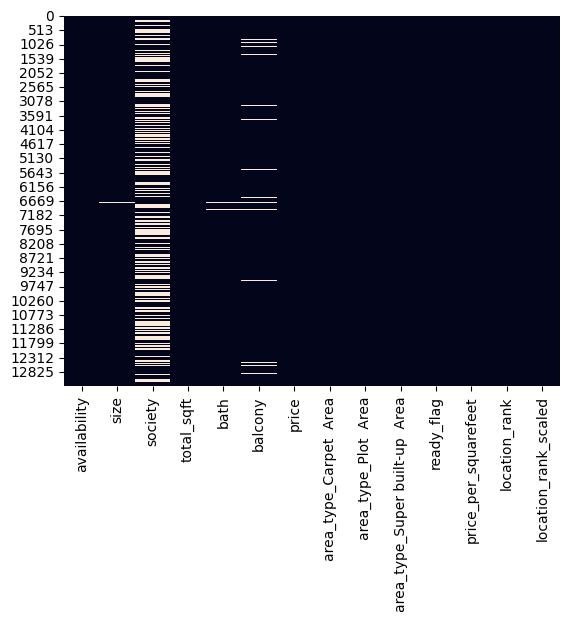

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isna(), cbar=False)
plt.show()


In [ ]:
df['size'] = df['size'].fillna(df['size'].mode()[0])


In [ ]:
df['size'].isna().sum()

np.int64(0)

In [ ]:
def extract_features(x):
    x = str(x).lower().strip()
    features = {"bedroom": 0, "hall": 0, "kitchen": 0}

    if "bhk" in x:
        num = int(x.split()[0])
        features["bedroom"] = num
        features["hall"] = 1
        features["kitchen"] = 1
    elif "bedroom" in x:
        num = int(x.split()[0])
        features["bedroom"] = num
    elif "rk" in x:
        num = int(x.split()[0])
        features["bedroom"] = num
        features["kitchen"] = 1

    return features

# Apply to dataframe
features_df = df['size'].apply(extract_features).apply(pd.Series)

# Merge with original dataframe
df = pd.concat([df, features_df], axis=1)




In [ ]:
df.head()

,availability,size,society,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,ready_flag,price_per_squarefeet,location_rank,location_rank_scaled,bedroom,hall,kitchen
0,352,2 BHK,Coomee,1056.0,2.0,1.0,39.07,0.0,0.0,1.0,0,0.036998,58,0.225296,2,1,1
1,0,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,0.0,1.0,0.0,1,0.046154,54,0.209486,4,0,0
2,0,3 BHK,NaN,1440.0,2.0,3.0,62.00,0.0,0.0,0.0,1,0.043056,50,0.193676,3,1,1
3,0,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,0.0,0.0,1.0,1,0.062459,25,0.094862,3,1,1
4,0,2 BHK,NaN,1200.0,2.0,1.0,51.00,0.0,0.0,1.0,1,0.042500,38,0.146245,2,1,1


In [ ]:
df=df.drop('size',axis=1)

In [ ]:
df.head()

,availability,society,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,ready_flag,price_per_squarefeet,location_rank,location_rank_scaled,bedroom,hall,kitchen
0,352,Coomee,1056.0,2.0,1.0,39.07,0.0,0.0,1.0,0,0.036998,58,0.225296,2,1,1
1,0,Theanmp,2600.0,5.0,3.0,120.00,0.0,1.0,0.0,1,0.046154,54,0.209486,4,0,0
2,0,NaN,1440.0,2.0,3.0,62.00,0.0,0.0,0.0,1,0.043056,50,0.193676,3,1,1
3,0,Soiewre,1521.0,3.0,1.0,95.00,0.0,0.0,1.0,1,0.062459,25,0.094862,3,1,1
4,0,NaN,1200.0,2.0,1.0,51.00,0.0,0.0,1.0,1,0.042500,38,0.146245,2,1,1


In [ ]:
df.rename(columns={'availability':'deliverydaysleft'},inplace=True)

In [ ]:
df.head()

,deliverydaysleft,society,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,ready_flag,price_per_squarefeet,location_rank,location_rank_scaled,bedroom,hall,kitchen
0,352,Coomee,1056.0,2.0,1.0,39.07,0.0,0.0,1.0,0,0.036998,58,0.225296,2,1,1
1,0,Theanmp,2600.0,5.0,3.0,120.00,0.0,1.0,0.0,1,0.046154,54,0.209486,4,0,0
2,0,NaN,1440.0,2.0,3.0,62.00,0.0,0.0,0.0,1,0.043056,50,0.193676,3,1,1
3,0,Soiewre,1521.0,3.0,1.0,95.00,0.0,0.0,1.0,1,0.062459,25,0.094862,3,1,1
4,0,NaN,1200.0,2.0,1.0,51.00,0.0,0.0,1.0,1,0.042500,38,0.146245,2,1,1


In [ ]:
df["society"].isna().sum()

np.int64(5502)

In [ ]:
df["society"].value_counts()

,count
society,
GrrvaGr,80
PrarePa,76
Sryalan,59
Prtates,59
GMown E,56
...,...
SLtalry,1
Rencyes,1
DiaveEn,1


In [ ]:
df.head()

,deliverydaysleft,society,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,ready_flag,price_per_squarefeet,location_rank,location_rank_scaled,bedroom,hall,kitchen
0,352,Coomee,1056.0,2.0,1.0,39.07,0.0,0.0,1.0,0,0.036998,58,0.225296,2,1,1
1,0,Theanmp,2600.0,5.0,3.0,120.00,0.0,1.0,0.0,1,0.046154,54,0.209486,4,0,0
2,0,NaN,1440.0,2.0,3.0,62.00,0.0,0.0,0.0,1,0.043056,50,0.193676,3,1,1
3,0,Soiewre,1521.0,3.0,1.0,95.00,0.0,0.0,1.0,1,0.062459,25,0.094862,3,1,1
4,0,NaN,1200.0,2.0,1.0,51.00,0.0,0.0,1.0,1,0.042500,38,0.146245,2,1,1


In [ ]:
df['society'] = df['society'].fillna('Unknown')


In [ ]:
threshold = 10
counts = df['society'].value_counts()
df['society_grouped'] = df['society'].apply(lambda x: x if counts[x] >= threshold else "Other")


In [ ]:
# now we will move on with target encoding which means to create a society based on the average square feet area to that column

In [ ]:
society_avg_price = df.groupby('society_grouped')['price_per_squarefeet'].mean()
df['society_encoded'] = df['society_grouped'].map(society_avg_price)


In [ ]:
df.head()

,deliverydaysleft,society,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,ready_flag,price_per_squarefeet,location_rank,location_rank_scaled,bedroom,hall,kitchen,society_grouped,society_encoded
0,352,Coomee,1056.0,2.0,1.0,39.07,0.0,0.0,1.0,0,0.036998,58,0.225296,2,1,1,Other,0.061283
1,0,Theanmp,2600.0,5.0,3.0,120.00,0.0,1.0,0.0,1,0.046154,54,0.209486,4,0,0,Theanmp,0.042670
2,0,Unknown,1440.0,2.0,3.0,62.00,0.0,0.0,0.0,1,0.043056,50,0.193676,3,1,1,Unknown,0.105677
3,0,Soiewre,1521.0,3.0,1.0,95.00,0.0,0.0,1.0,1,0.062459,25,0.094862,3,1,1,Soiewre,0.067051
4,0,Unknown,1200.0,2.0,1.0,51.00,0.0,0.0,1.0,1,0.042500,38,0.146245,2,1,1,Unknown,0.105677


In [ ]:
df.drop(['society', 'society_grouped'], axis=1, inplace=True)


In [ ]:
df.head()

,deliverydaysleft,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,ready_flag,price_per_squarefeet,location_rank,location_rank_scaled,bedroom,hall,kitchen,society_encoded
0,352,1056.0,2.0,1.0,39.07,0.0,0.0,1.0,0,0.036998,58,0.225296,2,1,1,0.061283
1,0,2600.0,5.0,3.0,120.00,0.0,1.0,0.0,1,0.046154,54,0.209486,4,0,0,0.042670
2,0,1440.0,2.0,3.0,62.00,0.0,0.0,0.0,1,0.043056,50,0.193676,3,1,1,0.105677
3,0,1521.0,3.0,1.0,95.00,0.0,0.0,1.0,1,0.062459,25,0.094862,3,1,1,0.067051
4,0,1200.0,2.0,1.0,51.00,0.0,0.0,1.0,1,0.042500,38,0.146245,2,1,1,0.105677


In [ ]:
df.sample(15)

,deliverydaysleft,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,ready_flag,price_per_squarefeet,location_rank,location_rank_scaled,bedroom,hall,kitchen,society_encoded
12056,0,1200.00,4.0,1.0,125.00,0.0,1.0,0.0,1,0.104167,47,0.181818,4,0,0,0.105677
156,0,1200.00,2.0,2.0,50.00,0.0,0.0,1.0,1,0.041667,40,0.154150,2,1,1,0.105677
7099,0,1200.00,3.0,2.0,160.00,0.0,1.0,0.0,1,0.133333,3,0.007905,4,0,0,0.105677
11270,0,1777.26,3.0,2.0,92.00,0.0,0.0,1.0,1,0.051765,89,0.347826,3,1,1,0.061283
11711,0,1145.00,2.0,2.0,68.50,0.0,0.0,1.0,1,0.059825,135,0.529644,2,1,1,0.105677
116,0,1540.00,2.0,3.0,64.00,0.0,0.0,1.0,1,0.041558,6,0.019763,3,1,1,0.061283
12620,0,1246.00,2.0,1.0,65.00,0.0,0.0,1.0,1,0.052167,173,0.679842,2,1,1,0.105677
1437,0,1650.00,2.0,2.0,80.00,0.0,0.0,0.0,1,0.048485,3,0.007905,3,1,1,0.105677
9615,0,1800.00,4.0,0.0,230.00,0.0,0.0,0.0,1,0.127778,94,0.367589,4,0,0,0.105677
12042,0,1025.00,2.0,2.0,45.00,0.0,0.0,1.0,1,0.043902,242,0.952569,2,1,1,0.105677


In [ ]:
dfchecker['availability'].value_counts()

,count
availability,
Ready To Move,10581
18-Dec,307
18-May,295
18-Apr,271
18-Aug,200
...,...
16-Oct,1
17-Jan,1
16-Nov,1


In [ ]:
df['total_sqft'].isna().sum()

np.int64(46)

In [ ]:
df.head()

,deliverydaysleft,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,ready_flag,price_per_squarefeet,location_rank,location_rank_scaled,bedroom,hall,kitchen,society_encoded
0,352,1056.0,2.0,1.0,39.07,0.0,0.0,1.0,0,0.036998,58,0.225296,2,1,1,0.061283
1,0,2600.0,5.0,3.0,120.00,0.0,1.0,0.0,1,0.046154,54,0.209486,4,0,0,0.042670
2,0,1440.0,2.0,3.0,62.00,0.0,0.0,0.0,1,0.043056,50,0.193676,3,1,1,0.105677
3,0,1521.0,3.0,1.0,95.00,0.0,0.0,1.0,1,0.062459,25,0.094862,3,1,1,0.067051
4,0,1200.0,2.0,1.0,51.00,0.0,0.0,1.0,1,0.042500,38,0.146245,2,1,1,0.105677


In [ ]:
# Skewness of total_sqft
skewness = df['total_sqft'].skew()
print("Skewness:", skewness)


Skewness: 15.267335905766558


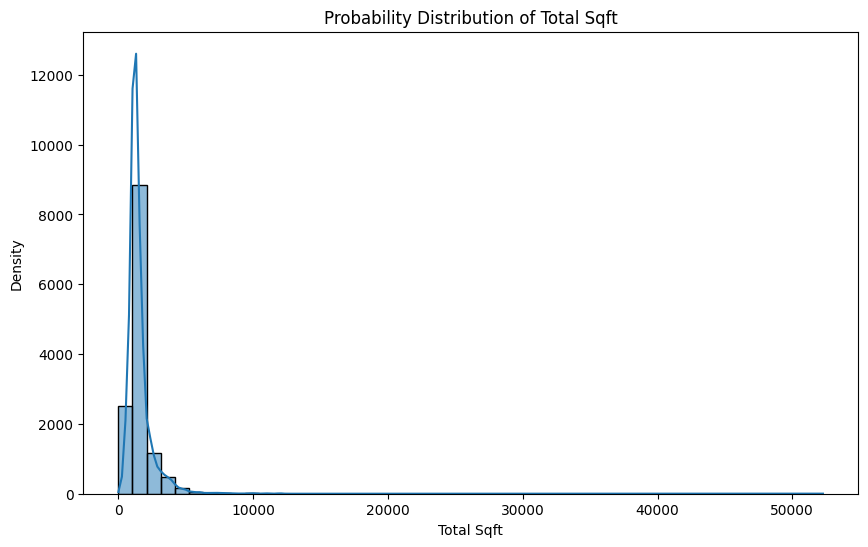

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(df['total_sqft'], kde=True, bins=50)
plt.title("Probability Distribution of Total Sqft")
plt.xlabel("Total Sqft")
plt.ylabel("Density")
plt.show()


<Axes: xlabel='total_sqft', ylabel='Density'>

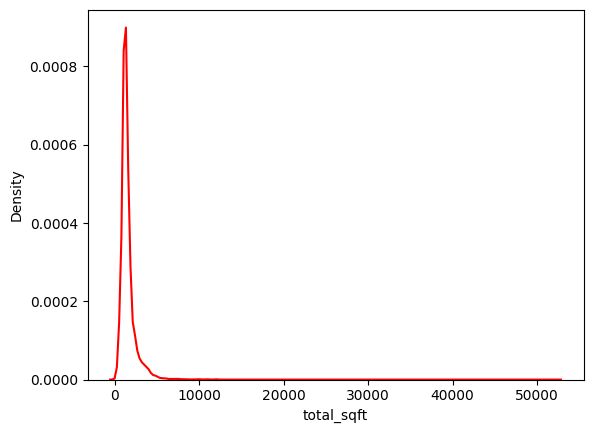

In [ ]:
sns.kdeplot(temp_df['total_sqft'].dropna(), label="Before Imputation", color="red")

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Select features for imputation
cols_for_knn = ['total_sqft', 'bedroom', 'hall', 'kitchen','price']
temp_df = df[cols_for_knn]

# Step 1: Scale data
scaler = StandardScaler()
scaled_array = scaler.fit_transform(temp_df)

# Step 2: Apply KNN imputer
imputer = KNNImputer(n_neighbors=5)
imputed_scaled_array = imputer.fit_transform(scaled_array)

# Step 3: Inverse scaling to get back original scale
imputed_array = scaler.inverse_transform(imputed_scaled_array)

# Step 4: Convert back to DataFrame
imputed_temp_df = pd.DataFrame(imputed_array, columns=cols_for_knn)

# Replace only total_sqft column in original df
df['total_sqft'] = imputed_temp_df['total_sqft']


In [ ]:
df.head()

,deliverydaysleft,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,ready_flag,price_per_squarefeet,location_rank,location_rank_scaled,bedroom,hall,kitchen,society_encoded
0,352,1056.0,2.0,1.0,39.07,0.0,0.0,1.0,0,0.036998,58,0.225296,2,1,1,0.061283
1,0,2600.0,5.0,3.0,120.00,0.0,1.0,0.0,1,0.046154,54,0.209486,4,0,0,0.042670
2,0,1440.0,2.0,3.0,62.00,0.0,0.0,0.0,1,0.043056,50,0.193676,3,1,1,0.105677
3,0,1521.0,3.0,1.0,95.00,0.0,0.0,1.0,1,0.062459,25,0.094862,3,1,1,0.067051
4,0,1200.0,2.0,1.0,51.00,0.0,0.0,1.0,1,0.042500,38,0.146245,2,1,1,0.105677


In [ ]:
df.isna().sum()

,0
deliverydaysleft,0
total_sqft,0
bath,73
balcony,609
price,0
area_type_Carpet Area,0
area_type_Plot Area,0
area_type_Super built-up Area,0
ready_flag,0
price_per_squarefeet,46


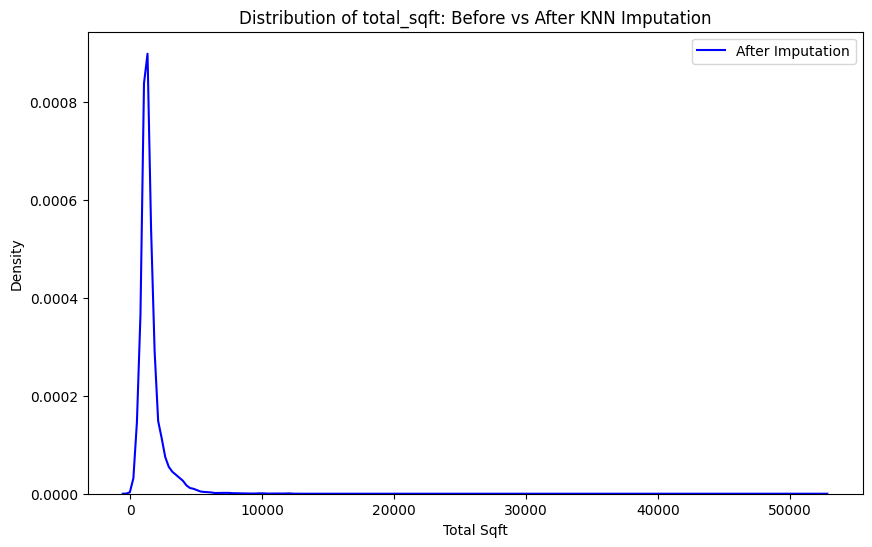

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

# After imputation
sns.kdeplot(df['total_sqft'], label="After Imputation", color="blue")

plt.title("Distribution of total_sqft: Before vs After KNN Imputation")
plt.xlabel("Total Sqft")
plt.ylabel("Density")
plt.legend()
plt.show()


In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Select columns for KNN (bath is target for imputation)
cols_for_knn_bath = ['bath', 'bedroom', 'hall', 'kitchen', 'total_sqft','price']
temp_df_bath = df[cols_for_knn_bath].copy()

# Scale features before KNN
scaler = StandardScaler()
scaled_array = scaler.fit_transform(temp_df_bath)

# Apply KNN Imputer
imputer = KNNImputer(n_neighbors=5)
imputed_array = imputer.fit_transform(scaled_array)

# Inverse scale back to original units
imputed_unscaled = scaler.inverse_transform(imputed_array)
imputed_temp_df = pd.DataFrame(imputed_unscaled, columns=cols_for_knn_bath)

# Replace only 'bath' column in original df
df['bath'] = imputed_temp_df['bath']

# Optional: round to nearest integer
df['bath'] = df['bath'].round(0)


In [ ]:
df.isna().sum()

,0
deliverydaysleft,0
total_sqft,0
bath,0
balcony,609
price,0
area_type_Carpet Area,0
area_type_Plot Area,0
area_type_Super built-up Area,0
ready_flag,0
price_per_squarefeet,46


In [ ]:
# Check skewness
balcony_skew = df['balcony'].skew()
print("Skewness of balcony column:", balcony_skew)


Skewness of balcony column: 0.005856767469113565


In [ ]:
# Correct way
df['balcony'] = df['balcony'].fillna(df['balcony'].mode()[0])


In [ ]:
df.isna().sum()

,0
deliverydaysleft,0
total_sqft,0
bath,0
balcony,0
price,0
area_type_Carpet Area,0
area_type_Plot Area,0
area_type_Super built-up Area,0
ready_flag,0
price_per_squarefeet,46


In [ ]:
# Make sure all total_sqft values are numeric and non-zero
df['price_per_squarefeet'] = df['price'] / df['total_sqft']


In [ ]:
df.isna().sum()

,0
deliverydaysleft,0
total_sqft,0
bath,0
balcony,0
price,0
area_type_Carpet Area,0
area_type_Plot Area,0
area_type_Super built-up Area,0
ready_flag,0
price_per_squarefeet,0


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('price', axis=1)  # or your target column
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)


LinearRegression()

In [ ]:
y_pred = lr_model.predict(X_test_scaled)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R^2 score: {r2}")


RMSE: 100.14465196922959
R^2 score: 0.5289479642690398


In [ ]:
import pickle

# Save the model
with open('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)

# Load the model later
with open('linear_regression_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
